In [2]:
#Importing libraries
import time
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Trip"]
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
import keras

Using TensorFlow backend.
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\.conda\envs\deeplearning

## lightning data

In [8]:
data = pd.read_csv('lightning.csv',sep=',')
shuffle(data)

,height,stype,pol_n_amp,2D error,response,w_radius
2,0.0,1,-21.9,0.076,0,1
311,0.0,1,-21.0,0.094,1,1
45,0.0,1,-3.9,0.097,0,1
39,0.0,1,-47.4,0.142,0,1
264,0.0,1,-6.0,0.125,1,1
...,...,...,...,...,...,...
353,0.0,1,-2.8,0.258,0,0
116,0.0,1,2.6,0.118,0,1
321,0.0,1,9.2,0.351,0,0
381,0.0,1,25.2,6.089,0,0


In [9]:
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

In [10]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["response"]]
# Store the variable we are predicting 
target = "response"
# Define a random state 
state = np.random.RandomState(42)
X_lightning = data[columns]
y_lightning = data[target]
# split X and y into training and testing sets

In [12]:
# Implementing Undersampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X,y=smk.fit_sample(X_lightning,y_lightning)

In [13]:
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(X_lightning, y_lightning, random_state=state, test_size=0.2)

print(len(x_train_l))
print(len(x_test_l))

print(len(y_train_l))
print(len(y_test_l))

408
103
408
103


## Weather Data

In [15]:
data = pd.read_csv('rain_wind.csv',sep=',')
data

,rainfall,wind_avg,rel_humidity,air_temp,response
0,0.0,0.50,87.7,24.10,0
1,0.0,0.50,87.7,24.10,0
2,0.0,0.50,87.7,24.10,0
3,0.0,0.50,87.7,24.10,0
4,0.0,0.50,87.7,24.10,0
...,...,...,...,...,...
399,0.0,1.74,88.5,25.12,1
400,0.0,1.74,88.5,25.12,1
401,0.0,1.74,88.5,25.12,1
402,0.0,1.74,88.5,25.12,1


In [16]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["response"]]
# Store the variable we are predicting 
target = "response"
# Define a random state 
state = np.random.RandomState(42)
X_weather = data[columns]
y_weather = data[target]
# split X and y into training and testing sets

X,y=smk.fit_sample(X_weather,y_weather)

x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(X_weather, y_weather, random_state=state, test_size=0.2)

In [17]:
data = pd.read_csv('lightnig_rain_wind.csv',sep=',')
data

,rainfall,wind_avg,rel_humidity,air_temp,height,stype,pol_n_amp,response,w_radius
0,0.0,0.50,87.7,24.10,0.0,1,22.9,0,1
1,0.0,0.50,87.7,24.10,0.0,1,46.2,0,1
2,0.0,0.50,87.7,24.10,0.0,1,12.5,0,1
3,0.0,0.50,87.7,24.10,0.0,1,7.8,0,1
4,0.0,0.50,87.7,24.10,0.0,1,-28.7,0,1
...,...,...,...,...,...,...,...,...,...
399,0.0,1.74,88.5,25.12,0.0,1,-4.3,1,1
400,0.0,1.74,88.5,25.12,0.0,1,-10.0,1,1
401,0.0,1.74,88.5,25.12,0.0,1,-42.1,1,1
402,0.0,1.74,88.5,25.12,0.0,1,11.2,1,1


In [18]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["response"]]
# Store the variable we are predicting 
target = "response"
# Define a random state 
state = np.random.RandomState(42)
X_all = data[columns]
y_all = data[target]
# split X and y into training and testing sets

X,y=smk.fit_sample(X_all,y_all)

x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, random_state=state, test_size=0.2)

In [101]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130558 entries, 2016-01-01 00:00:00 to 2020-01-21 14:00:00
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   wind_avg      130558 non-null  float64
 1   rel_humidity  130558 non-null  float64
 2   air_temp      130558 non-null  float64
dtypes: float64(3)
memory usage: 4.0 MB


# Model Building

## Random forest

In [21]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import sklearn

In [136]:
#create model and fit 
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [137]:
#accuracy of the model
rfc.score(x_test, y_test)

1.0

In [138]:
#predicting validation set from the csv
y_pred = rfc.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [139]:
# Evaluate model with confusion matrix, classification report and accuracy score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[45  0]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        62

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

1.0


<Figure size 864x576 with 0 Axes>

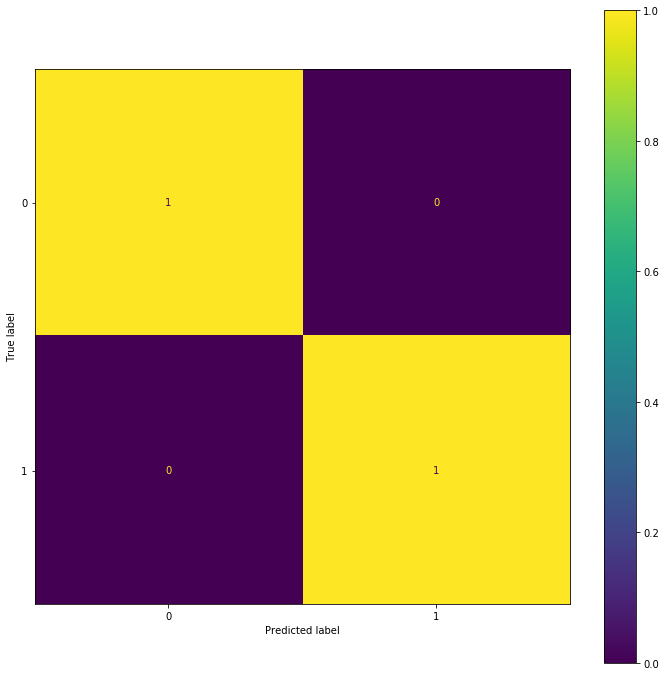

In [140]:
plt.figure(figsize=(12,8))
f,ax=plt.subplots(1,1,figsize=(12,12))
# print("Classification report for classifier %s:\n%s\n"
#       % (rfc, metrics.classification_report(y_test, y_pred)))
disp = metrics.plot_confusion_matrix(rfc, x_test, y_test,normalize='true',ax=ax)

## SVM

In [141]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

clf.fit(x_train, y_train)     

y_pred = clf.predict(x_test)

In [142]:
# Evaluate model with confusion matrix, classification report and accuracy score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[45  0]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        62

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

1.0


<Figure size 864x576 with 0 Axes>

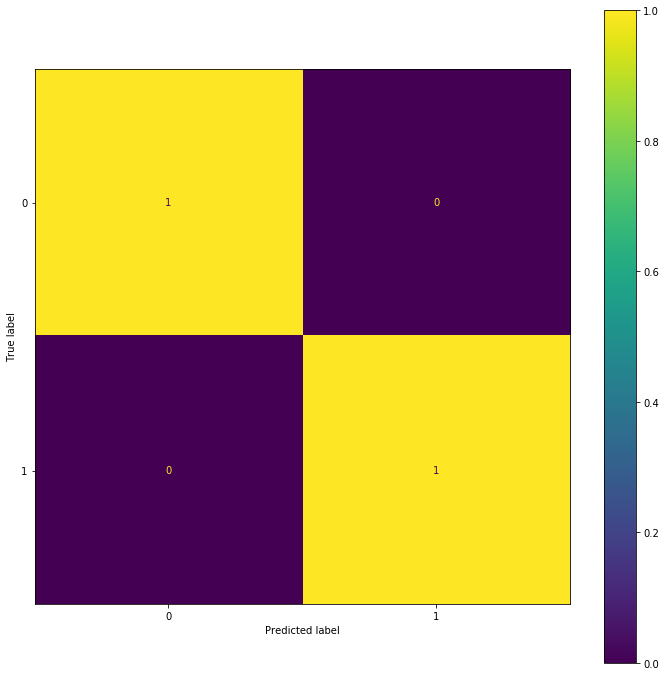

In [143]:
plt.figure(figsize=(12,8))
f,ax=plt.subplots(1,1,figsize=(12,12))
# print("Classification report for classifier %s:\n%s\n"
#       % (rfc, metrics.classification_report(y_test, y_pred)))
disp = metrics.plot_confusion_matrix(rfc, x_test, y_test,normalize='true',ax=ax)

## Linear regression

In [144]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')

lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8037383177570093

In [145]:
y_pred = lr.predict(x_test)

In [146]:
# Evaluate model with confusion matrix, classification report and accuracy score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[41  4]
 [17 45]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        45
           1       0.92      0.73      0.81        62

    accuracy                           0.80       107
   macro avg       0.81      0.82      0.80       107
weighted avg       0.83      0.80      0.80       107

0.8037383177570093


# K-FOLD Cross Validation

# Random Forest

In [147]:
score = cross_val_score(rfc, X, y,cv=10)

np.average(score)

0.9291754018169114

# SVC

In [148]:
score = cross_val_score(svm, X, y,cv=10)

np.average(score)

0.9421733053808525

# Linear Regression

In [149]:
from sklearn.linear_model import LogisticRegression

score = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),  X, y,cv=10)

np.average(score)

0.808490566037736

# Ensemble 

In [22]:
rfc1 = RandomForestClassifier(n_jobs=-1, n_estimators=100)
rfc2 = RandomForestClassifier(n_jobs=-1, n_estimators=100)
rfc3 = RandomForestClassifier(n_jobs=-1, n_estimators=100)
#svc = clf = SVC(gamma='auto')
#lr= LogisticRegression(solver='liblinear',multi_class='ovr')

rfc1.fit(x_train_l, y_train_l)
rfc2.fit(x_train_w, y_train_w)
rfc3.fit(x_train_all, y_train_all)

pred1=rfc1.predict(x_test_l)
pred2=rfc2.predict(x_test_w)
pred3=rfc3.predict(x_test_all)

final_pred = np.array([])
for i in range(0,len(x_test_all)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

NameError: name 'mode' is not defined